<a href="https://colab.research.google.com/github/28Aarya/FHI-score-for-stocks/blob/main/FINAL_FINANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

In [141]:
stocks = ['F', 'TM', 'RACE', 'GM','TSLA','NSANY','RIVN','HMC', 'STLA', 'DOMVF', 'BLBD']

def fetch_metrics(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info

    metrics = {
        'ticker': ticker,
        'currentRatio': info.get('currentRatio', None),#Shows if a company can pay short-term debts (higher = safer)
        'debtToEquity': info.get('debtToEquity', None), #How much debt the company has compared to its equity (lower = safer).
        'returnOnEquity': info.get('returnOnEquity', None), #How efficiently the company uses investors’ money to generate profit (higher = better).
        'priceToBook': info.get('priceToBook', None), #Compares the company’s market price to its actual book value (lower = undervalued).
        'earningsGrowth': info.get('earningsGrowth', None), #How much the company's earnings are growing (higher = better).
        'dividendYield': info.get('dividendYield', None), #How much a company pays in dividends relative to its stock price (higher = better for income investors)
        'beta': info.get('beta', None), #Measures how volatile the stock is compared to the market (beta > 1 = riskier, < 1 = safer).
        'revenue': info.get('totalRevenue', None)
    }

    return metrics

financial_data = [fetch_metrics(stock) for stock in stocks]
financial_df = pd.DataFrame(financial_data)
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.950673,-0.265,0.0571,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067726,-0.546,0.0296,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,24.110533,0.143,0.0057,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.817387,0.218,0.0090,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,17.875357,0.170,NaN,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003117,NaN,0.0516,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.500866,NaN,NaN,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009870,-0.592,0.0545,0.490,21617023385600
8,STLA,1.144,39.188,0.16757,0.494205,-0.455,0.1218,1.238,176192995328
9,DOMVF,1.590,22.883,0.09053,0.036587,-0.956,0.2436,0.928,119569465344


In [142]:
financial_df.isnull().sum()

,0
ticker,0
currentRatio,0
debtToEquity,0
returnOnEquity,0
priceToBook,0
earningsGrowth,2
dividendYield,3
beta,0
revenue,0


In [143]:
print(financial_df.loc[financial_df['dividendYield'].isnull(), ['ticker', 'dividendYield']])
print(financial_df.loc[financial_df['earningsGrowth'].isnull(), ['ticker', 'earningsGrowth']])

   ticker  dividendYield
4    TSLA            NaN
6    RIVN            NaN
10   BLBD            NaN
  ticker  earningsGrowth
5  NSANY             NaN
6   RIVN             NaN


In [144]:
financial_df['dividendYield'].fillna(00, inplace= True)
financial_df

<ipython-input-144-d65226946555>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_df['dividendYield'].fillna(00, inplace= True)


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.950673,-0.265,0.0571,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067726,-0.546,0.0296,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,24.110533,0.143,0.0057,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.817387,0.218,0.0090,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,17.875357,0.170,0.0000,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003117,NaN,0.0516,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.500866,NaN,0.0000,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009870,-0.592,0.0545,0.490,21617023385600
8,STLA,1.144,39.188,0.16757,0.494205,-0.455,0.1218,1.238,176192995328
9,DOMVF,1.590,22.883,0.09053,0.036587,-0.956,0.2436,0.928,119569465344


In [145]:
def calculate_earnings_growth(eps_23, eps_24, ticker, financial_df):
  earnings_growth= (eps_24 - eps_23)/eps_23
  print(f"Earnings growth for {ticker}: {earnings_growth:.2f}")
  financial_df.loc[financial_df['ticker']==ticker, 'earningsGrowth']= earnings_growth

  return earnings_growth

nsany_23= 0.84
nsany_24= 1.53

rivn_23= -5.74
rivn_24= -1.44

calculate_earnings_growth(nsany_23, nsany_24, 'NSANY', financial_df)
calculate_earnings_growth(rivn_23, rivn_24, 'RIVN', financial_df)
financial_df

Earnings growth for NSANY: 0.82
Earnings growth for RIVN: -0.75


,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,1.147,359.359,0.07990,0.950673,-0.265000,0.0571,1.636,182743007232
1,TM,1.229,103.530,0.12594,0.067726,-0.546000,0.0296,0.404,46396157722624
2,RACE,1.538,92.559,0.46376,24.110533,0.143000,0.0057,0.992,6464526848
3,GM,1.209,174.581,0.14167,0.817387,0.218000,0.0090,1.414,182719004672
4,TSLA,1.844,18.078,0.20389,17.875357,0.170000,0.0000,2.295,97150001152
5,NSANY,1.793,120.844,0.02716,0.003117,0.821429,0.0516,0.933,12606590943232
6,RIVN,5.089,102.458,-0.67157,2.500866,-0.749129,0.0000,2.045,4551000064
7,HMC,1.431,82.738,0.08327,0.009870,-0.592000,0.0545,0.490,21617023385600
8,STLA,1.144,39.188,0.16757,0.494205,-0.455000,0.1218,1.238,176192995328
9,DOMVF,1.590,22.883,0.09053,0.036587,-0.956000,0.2436,0.928,119569465344


In [146]:
financial_df.describe()

,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01
mean,1.764455,107.916818,0.187203,5.094943,-0.025427,0.052082,1.272182,7.399133e+12
std,1.129186,94.948079,0.471500,8.411994,0.830315,0.073635,0.599574,1.475374e+13
min,1.144000,18.078000,-0.671570,0.003117,-0.956000,0.000000,0.404000,1.299905e+09
25%,1.219000,55.027500,0.081585,0.052156,-0.569000,0.002850,0.930500,5.180726e+10
50%,1.431000,92.559000,0.125940,0.817387,-0.265000,0.029600,1.238000,1.761930e+11
75%,1.691500,112.187000,0.185730,5.839458,0.194000,0.055800,1.627500,6.394667e+12
max,5.089000,359.359000,1.347110,24.110533,1.931000,0.243600,2.295000,4.639616e+13


In [147]:
#standardise the data
std_columns= financial_df.columns[1:]
financial_df[std_columns]= financial_df[std_columns].apply(lambda x: (x - x.mean())/x.std())
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue
0,F,-0.546814,2.648207,-0.227577,-0.492662,-0.288532,0.068149,0.606795,-0.489123
1,TM,-0.474195,-0.046202,-0.129931,-0.597625,-0.626958,-0.305314,-1.447998,2.643196
2,RACE,-0.200547,-0.161750,0.586547,2.260533,0.202848,-0.629887,-0.467302,-0.501071
3,GM,-0.491907,0.702112,-0.096570,-0.508507,0.293175,-0.585071,0.236532,-0.489124
4,TSLA,0.070445,-0.946189,0.035392,1.519309,0.235365,-0.707295,1.705909,-0.494924
5,NSANY,0.025280,0.136150,-0.339433,-0.605305,1.019921,-0.006543,-0.565705,0.352959
6,RIVN,2.944197,-0.057493,-1.821362,-0.308378,-0.871599,-0.707295,1.288946,-0.501201
7,HMC,-0.295305,-0.265185,-0.220430,-0.604503,-0.682359,0.032840,-1.304563,0.963681
8,STLA,-0.549471,-0.723857,-0.041639,-0.546926,-0.517361,0.946805,-0.057010,-0.489567
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.601327,-1.120747,2.600906,-0.574044,-0.493405


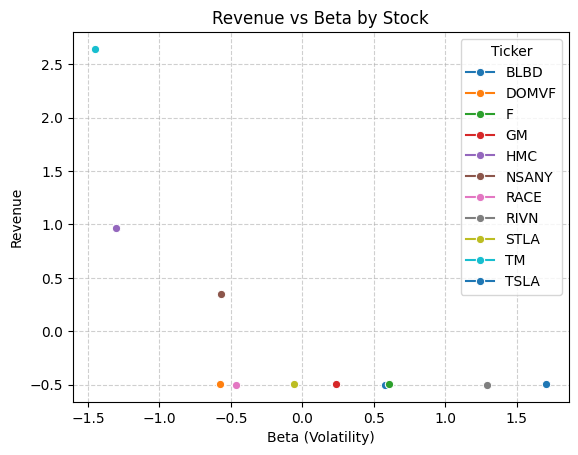

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the data by ticker and beta to ensure the zigzag lines make sense
financial_df_sorted = financial_df.sort_values(by=['ticker', 'beta'])

# Plot the line graph for revenue vs beta
#plt.figure(figsize=(12, 6))
sns.lineplot(
    data=financial_df_sorted,
    x='beta',
    y='revenue',
    hue='ticker',
    marker='o',
    palette='tab10'
)

# Adding titles and labels
plt.title('Revenue vs Beta by Stock')
plt.xlabel('Beta (Volatility)')
plt.ylabel('Revenue')
plt.legend(title='Ticker')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


In [118]:
weights = {
    'stability': {
        'currentRatio': 0.2,
        'debtToEquity': 0.2,
        'beta': 0.2,
        'dividendYield': 0.1,
        'returnOnEquity': 0.075,
        'priceToBook': 0.05,
        'revenue': 0.05,
        'earningsGrowth': 0.1
    },

    'growth': {
        'earningsGrowth': 0.25,
        'revenue': 0.25,
        'returnOnEquity': 0.2,
        'debtToEquity': 0.1,
        'priceToBook': 0.075,
        'beta': 0.05,
        'dividendYield': 0.05,
        'currentRatio': 0.05
    },

    'Value': {
        'priceToBook': 0.25,
        'dividendYield': 0.05,
        'debtToEquity': 0.2,
        'returnOnEquity': 0.075,
        'revenue': 0.05,
        'earningsGrowth': 0.1,
        'currentRatio': 0.05,
        'beta': 0.25
    }
}


In [119]:
def calculate_fhi(metrics, weights):
    fhi_score = 0

    for metric, weight in weights.items():
        if metric in metrics and metrics[metric] is not None:
            fhi_score += metrics[metric] * weight

    return fhi_score


In [135]:
def get_user_choice():
    print("What are you looking for in the stock market?")
    print("1. Stability")
    print("2. Growth")
    print("3. Value")


    choice = input("Enter your choice (1/2/3): ")


    if choice == '1':
        return 'stability'
    elif choice == '2':
        return 'growth'
    elif choice == '3':
        return 'Value'
    else:
        print("Invalid input. Please enter a valid number (1/2/3).")
        return get_user_choice()
global user_choice
user_choice = get_user_choice()

chosen_weights = weights[user_choice]
def calculate_fhi_for_stocks(df, chosen_weights):
    df['FHI'] = df.apply(lambda row: calculate_fhi(row[chosen_weights.keys()], chosen_weights), axis=1)
    return df

financial_df = calculate_fhi_for_stocks(financial_df, chosen_weights)
print(financial_df[['ticker', 'FHI']])


What are you looking for in the stock market?
1. Stability
2. Growth
3. Value
Enter your choice (1/2/3): 2
   ticker       FHI
0       F -0.005652
1      TM  0.317256
2    RACE  0.131232
3      GM -0.078251
4    TSLA  0.014971
5   NSANY  0.216202
6    RIVN -0.560058
7     HMC -0.123963
8    STLA -0.356449
9   DOMVF -0.485584
10   BLBD  0.930295


In [121]:
user_choice

'stability'

In [122]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI
0,F,-0.546814,2.648207,-0.227577,-0.492662,-0.288532,0.068149,0.606795,-0.489123,0.453442
1,TM,-0.474195,-0.046202,-0.129931,-0.597625,-0.626958,-0.305314,-1.447998,2.643196,-0.394373
2,RACE,-0.200547,-0.161750,0.586547,2.260533,0.202848,-0.629887,-0.467302,-0.501071,-0.076659
3,GM,-0.491907,0.702112,-0.096570,-0.508507,0.293175,-0.585071,0.236532,-0.489124,0.003033
4,TSLA,0.070445,-0.946189,0.035392,1.519309,0.235365,-0.707295,1.705909,-0.494924,0.172714
5,NSANY,0.025280,0.136150,-0.339433,-0.605305,1.019921,-0.006543,-0.565705,0.352959,-0.017592
6,RIVN,2.944197,-0.057493,-1.821362,-0.308378,-0.871599,-0.707295,1.288946,-0.501201,0.500160
7,HMC,-0.295305,-0.265185,-0.220430,-0.604503,-0.682359,0.032840,-1.304563,0.963681,-0.436536
8,STLA,-0.549471,-0.723857,-0.041639,-0.546926,-0.517361,0.946805,-0.057010,-0.489567,-0.278071
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.601327,-1.120747,2.600906,-0.574044,-0.493405,-0.246923


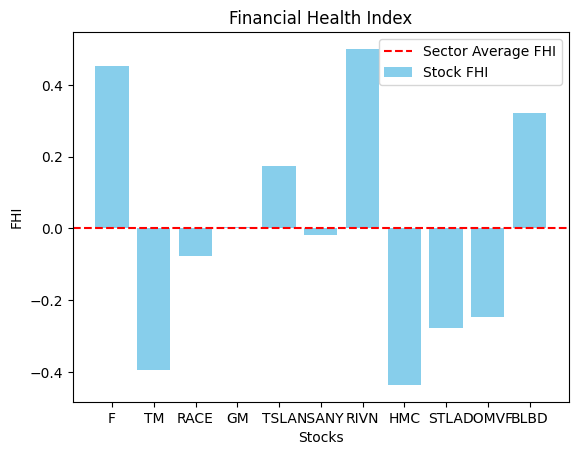

In [123]:
sector_avg_fhi = financial_df['FHI'].mean()

plt.axhline(y=sector_avg_fhi, color='r', linestyle='--', label='Sector Average FHI')
plt.bar(financial_df['ticker'], financial_df['FHI'], color='skyblue', label='Stock FHI')
plt.title('Financial Health Index')
plt.xlabel('Stocks')
plt.ylabel('FHI')
plt.legend()
plt.show()

In [124]:
financial_df['Performance']= financial_df["FHI"].apply(lambda x: "Overperforming" if x > sector_avg_fhi else "Underperforming")
print(financial_df[['ticker', 'FHI', 'Performance']])

   ticker       FHI      Performance
0       F  0.453442   Overperforming
1      TM -0.394373  Underperforming
2    RACE -0.076659  Underperforming
3      GM  0.003033   Overperforming
4    TSLA  0.172714   Overperforming
5   NSANY -0.017592  Underperforming
6    RIVN  0.500160   Overperforming
7     HMC -0.436536  Underperforming
8    STLA -0.278071  Underperforming
9   DOMVF -0.246923  Underperforming
10   BLBD  0.320805   Overperforming


In [125]:
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI,Performance
0,F,-0.546814,2.648207,-0.227577,-0.492662,-0.288532,0.068149,0.606795,-0.489123,0.453442,Overperforming
1,TM,-0.474195,-0.046202,-0.129931,-0.597625,-0.626958,-0.305314,-1.447998,2.643196,-0.394373,Underperforming
2,RACE,-0.200547,-0.161750,0.586547,2.260533,0.202848,-0.629887,-0.467302,-0.501071,-0.076659,Underperforming
3,GM,-0.491907,0.702112,-0.096570,-0.508507,0.293175,-0.585071,0.236532,-0.489124,0.003033,Overperforming
4,TSLA,0.070445,-0.946189,0.035392,1.519309,0.235365,-0.707295,1.705909,-0.494924,0.172714,Overperforming
5,NSANY,0.025280,0.136150,-0.339433,-0.605305,1.019921,-0.006543,-0.565705,0.352959,-0.017592,Underperforming
6,RIVN,2.944197,-0.057493,-1.821362,-0.308378,-0.871599,-0.707295,1.288946,-0.501201,0.500160,Overperforming
7,HMC,-0.295305,-0.265185,-0.220430,-0.604503,-0.682359,0.032840,-1.304563,0.963681,-0.436536,Underperforming
8,STLA,-0.549471,-0.723857,-0.041639,-0.546926,-0.517361,0.946805,-0.057010,-0.489567,-0.278071,Underperforming
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.601327,-1.120747,2.600906,-0.574044,-0.493405,-0.246923,Underperforming


In [126]:
new_df= financial_df[['ticker', 'revenue','beta','FHI','Performance']]
new_df

,ticker,revenue,beta,FHI,Performance
0,F,-0.489123,0.606795,0.453442,Overperforming
1,TM,2.643196,-1.447998,-0.394373,Underperforming
2,RACE,-0.501071,-0.467302,-0.076659,Underperforming
3,GM,-0.489124,0.236532,0.003033,Overperforming
4,TSLA,-0.494924,1.705909,0.172714,Overperforming
5,NSANY,0.352959,-0.565705,-0.017592,Underperforming
6,RIVN,-0.501201,1.288946,0.500160,Overperforming
7,HMC,0.963681,-1.304563,-0.436536,Underperforming
8,STLA,-0.489567,-0.057010,-0.278071,Underperforming
9,DOMVF,-0.493405,-0.574044,-0.246923,Underperforming


In [127]:
financial_df['FHI_zscore'] = (financial_df['FHI'] - financial_df['FHI'].mean()) / financial_df['FHI'].std()
#detect the outliers

def detect_outliers(FHI_zscore, financial_df):
    if FHI_zscore > 1.00:
        return 'Overvalued'
    elif 0.00> FHI_zscore >= -1.00:
      return 'Undervalued'
    else:
      return 'Fairly Valued'

financial_df['Valuation']= financial_df['FHI_zscore'].apply(lambda x: detect_outliers(x, financial_df))
financial_df

,ticker,currentRatio,debtToEquity,returnOnEquity,priceToBook,earningsGrowth,dividendYield,beta,revenue,FHI,Performance,FHI_zscore,Valuation
0,F,-0.546814,2.648207,-0.227577,-0.492662,-0.288532,0.068149,0.606795,-0.489123,0.453442,Overperforming,1.380356,Overvalued
1,TM,-0.474195,-0.046202,-0.129931,-0.597625,-0.626958,-0.305314,-1.447998,2.643196,-0.394373,Underperforming,-1.200539,Fairly Valued
2,RACE,-0.200547,-0.161750,0.586547,2.260533,0.202848,-0.629887,-0.467302,-0.501071,-0.076659,Underperforming,-0.233365,Undervalued
3,GM,-0.491907,0.702112,-0.096570,-0.508507,0.293175,-0.585071,0.236532,-0.489124,0.003033,Overperforming,0.009234,Fairly Valued
4,TSLA,0.070445,-0.946189,0.035392,1.519309,0.235365,-0.707295,1.705909,-0.494924,0.172714,Overperforming,0.525770,Fairly Valued
5,NSANY,0.025280,0.136150,-0.339433,-0.605305,1.019921,-0.006543,-0.565705,0.352959,-0.017592,Underperforming,-0.053553,Undervalued
6,RIVN,2.944197,-0.057493,-1.821362,-0.308378,-0.871599,-0.707295,1.288946,-0.501201,0.500160,Overperforming,1.522573,Overvalued
7,HMC,-0.295305,-0.265185,-0.220430,-0.604503,-0.682359,0.032840,-1.304563,0.963681,-0.436536,Underperforming,-1.328892,Fairly Valued
8,STLA,-0.549471,-0.723857,-0.041639,-0.546926,-0.517361,0.946805,-0.057010,-0.489567,-0.278071,Underperforming,-0.846496,Undervalued
9,DOMVF,-0.154496,-0.895582,-0.205032,-0.601327,-1.120747,2.600906,-0.574044,-0.493405,-0.246923,Underperforming,-0.751675,Undervalued


In [128]:
new_df= financial_df[['ticker', 'revenue','beta','FHI_zscore','Performance','Valuation']]
new_df

,ticker,revenue,beta,FHI_zscore,Performance,Valuation
0,F,-0.489123,0.606795,1.380356,Overperforming,Overvalued
1,TM,2.643196,-1.447998,-1.200539,Underperforming,Fairly Valued
2,RACE,-0.501071,-0.467302,-0.233365,Underperforming,Undervalued
3,GM,-0.489124,0.236532,0.009234,Overperforming,Fairly Valued
4,TSLA,-0.494924,1.705909,0.525770,Overperforming,Fairly Valued
5,NSANY,0.352959,-0.565705,-0.053553,Underperforming,Undervalued
6,RIVN,-0.501201,1.288946,1.522573,Overperforming,Overvalued
7,HMC,0.963681,-1.304563,-1.328892,Underperforming,Fairly Valued
8,STLA,-0.489567,-0.057010,-0.846496,Underperforming,Undervalued
9,DOMVF,-0.493405,-0.574044,-0.751675,Underperforming,Undervalued


In [129]:
def categorize_fhi(fhi_zscore):
    if fhi_zscore < -1.00:
        return 'Low'
    elif -1.00 <= fhi_zscore <= 1.00:
        return 'Moderate'
    else:
        return 'High'

new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)
new_df

<ipython-input-129-b742beb6edd1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)


,ticker,revenue,beta,FHI_zscore,Performance,Valuation,FHI_Category
0,F,-0.489123,0.606795,1.380356,Overperforming,Overvalued,High
1,TM,2.643196,-1.447998,-1.200539,Underperforming,Fairly Valued,Low
2,RACE,-0.501071,-0.467302,-0.233365,Underperforming,Undervalued,Moderate
3,GM,-0.489124,0.236532,0.009234,Overperforming,Fairly Valued,Moderate
4,TSLA,-0.494924,1.705909,0.525770,Overperforming,Fairly Valued,Moderate
5,NSANY,0.352959,-0.565705,-0.053553,Underperforming,Undervalued,Moderate
6,RIVN,-0.501201,1.288946,1.522573,Overperforming,Overvalued,High
7,HMC,0.963681,-1.304563,-1.328892,Underperforming,Fairly Valued,Low
8,STLA,-0.489567,-0.057010,-0.846496,Underperforming,Undervalued,Moderate
9,DOMVF,-0.493405,-0.574044,-0.751675,Underperforming,Undervalued,Moderate


In [130]:
def make_recommendations(new_df, user_choice):
    # Add FHI category to dataframe
    new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)

    recommendations = []

    for _, row in new_df.iterrows():
        fhi_category = row['FHI_Category']
        performance = row['Performance']
        valuation = row['Valuation']
        beta = row['beta']
        revenue = row['revenue']

        if user_choice == 'stability':
            if performance == 'Overperforming' and beta < 1.0 and valuation=='Fairly Valued':
                recommendations.append('Buy')
            elif fhi_category == 'Moderate' and valuation == 'Fairly Valued':
                recommendations.append('Keep an Eye')
            elif performance == 'Underperforming' or valuation == 'Overvalued':
                recommendations.append('Avoid')
            else:
                recommendations.append('Keep an Eye')

        elif user_choice == 'growth':  # Growth
            if fhi_category  == 'High' or 'Moderate' and performance == 'Overperforming' :
                recommendations.append('Buy')
            elif fhi_category  == 'High' or 'Moderate' and performance== 'Overperforming' :
                recommendations.append('Keep an Eye')
            elif performance == 'Underperforming' and valuation == 'Fairly Valued':
                recommendations.append('Avoid')
            else:
                recommendations.append('Keep an Eye')


        elif user_choice == 'Value':  # Value
            if fhi_category == 'High' or 'Moderate' and performance== 'overperforming' and valuation == 'Fairly Valued':
                recommendations.append('Buy')
            elif fhi_category == 'Moderate' and valuation == 'Undervalued':
                recommendations.append('Keep an Eye')
            elif performance == 'Underperforming' and valuation == 'Fairly Valued' or 'Overvalued':
                recommendations.append('Avoid')
            else:
                recommendations.append('Keep an Eye')


        else:
            recommendations.append('Invalid Choice')

    # Add recommendations to the dataframe
    new_df['Recommendation'] = recommendations
    return new_df


In [131]:
new_df = make_recommendations(new_df, user_choice)
print(new_df[['ticker', 'Recommendation']])

   ticker Recommendation
0       F          Avoid
1      TM          Avoid
2    RACE          Avoid
3      GM            Buy
4    TSLA    Keep an Eye
5   NSANY          Avoid
6    RIVN          Avoid
7     HMC          Avoid
8    STLA          Avoid
9   DOMVF          Avoid
10   BLBD            Buy


<ipython-input-130-fd05fc738673>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FHI_Category'] = new_df['FHI_zscore'].apply(categorize_fhi)
<ipython-input-130-fd05fc738673>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Recommendation'] = recommendations


In [132]:
new_df

,ticker,revenue,beta,FHI_zscore,Performance,Valuation,FHI_Category,Recommendation
0,F,-0.489123,0.606795,1.380356,Overperforming,Overvalued,High,Avoid
1,TM,2.643196,-1.447998,-1.200539,Underperforming,Fairly Valued,Low,Avoid
2,RACE,-0.501071,-0.467302,-0.233365,Underperforming,Undervalued,Moderate,Avoid
3,GM,-0.489124,0.236532,0.009234,Overperforming,Fairly Valued,Moderate,Buy
4,TSLA,-0.494924,1.705909,0.525770,Overperforming,Fairly Valued,Moderate,Keep an Eye
5,NSANY,0.352959,-0.565705,-0.053553,Underperforming,Undervalued,Moderate,Avoid
6,RIVN,-0.501201,1.288946,1.522573,Overperforming,Overvalued,High,Avoid
7,HMC,0.963681,-1.304563,-1.328892,Underperforming,Fairly Valued,Low,Avoid
8,STLA,-0.489567,-0.057010,-0.846496,Underperforming,Undervalued,Moderate,Avoid
9,DOMVF,-0.493405,-0.574044,-0.751675,Underperforming,Undervalued,Moderate,Avoid


In [133]:
def test_always_avoid_stocks():
    avoid_stocks = ['RIVN', 'DOMFV']

    for user_choice in ['stability', 'growth', 'value']:
        result_df = make_recommendations(new_df, user_choice)

        for ticker in avoid_stocks:
            recommendation = result_df.loc[result_df['ticker'] == ticker, 'Recommendation'].values[0]
            assert recommendation == 'Avoid', f"{ticker} was not avoided for {user_choice}."


In [138]:
def test_fhi_calculation(financial_df, user_choice, for_ford, for_tesla):

    if user_choice == 'stability':
        ford_fhi = financial_df[financial_df['ticker'] == 'F']['FHI'].item()
        assert round(ford_fhi, 2) == round(for_ford, 2), f"Ford's FHI doesn't match: {ford_fhi}"

    elif user_choice == 'growth':
        tesla_fhi = financial_df[financial_df['ticker'] == 'TSLA']['FHI'].item()
        assert round(tesla_fhi, 2) == round(for_tesla, 2), f"Tesla's FHI doesn't match: {tesla_fhi}"

    else:
        raise ValueError("Invalid user choice, only 'stability' or 'growth' are allowed.")


for_ford = 0.453442
for_tesla = 0.014971

test_fhi_calculation(financial_df, user_choice, for_ford, for_tesla)

